# CÂU 1

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 462kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.22MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.72MB/s]


Epoch 1, Loss: 0.2780
Epoch 2, Loss: 0.0847
Epoch 3, Loss: 0.0658
Epoch 4, Loss: 0.0546
Epoch 5, Loss: 0.0482


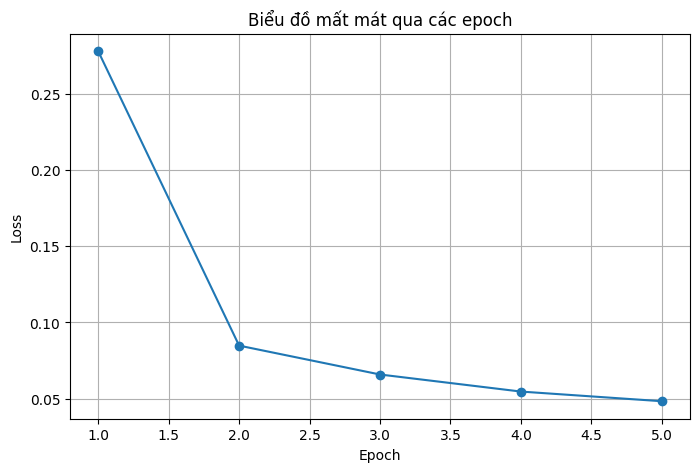

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = self.fc1(x)
        return x

model = MNIST_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_values = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# Vẽ biểu đồ mất mát
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), loss_values, marker='o')
plt.title("Biểu đồ mất mát qua các epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

### LÝ DO
Số lượng epoch ảnh hưởng đến kết quả vì nó xác định số lần mô hình được huấn luyện trên toàn bộ dữ liệu, giúp cải thiện khả năng dự đoán. Nếu số epoch quá ít, mô hình có thể không học đủ đặc trưng; ngược lại, nếu quá nhiều, mô hình có thể bị overfitting. Kết quả huấn luyện cho thấy mất mát giảm dần qua các epoch, cho thấy mô hình đang học tốt hơn.

# CÂU 2


Epoch 1, Loss: 0.6030
Epoch 2, Loss: 0.1126
Epoch 3, Loss: 0.0815
Epoch 4, Loss: 0.0651
Epoch 5, Loss: 0.0565


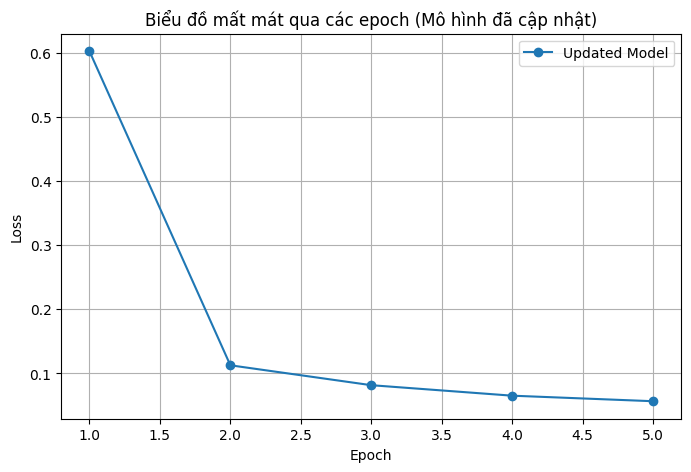

In [7]:
class MNIST_CNN_Updated(nn.Module):
    def __init__(self):
        super(MNIST_CNN_Updated, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # 26x26
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Giảm kích thước
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # 11x11
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)  # 3x3
        self.fc1 = nn.Linear(64 * 1 * 1, 10)  # Cập nhật kích thước đầu vào cho fc1

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 26x26 -> 13x13
        x = self.pool(torch.relu(self.conv2(x)))  # 11x11 -> 5x5
        x = self.pool(torch.relu(self.conv3(x)))  # 3x3 -> 1x1
        x = x.view(-1, 64 * 1 * 1)  # Cập nhật kích thước sau pooling
        x = self.fc1(x)
        return x

# Khởi tạo mô hình mới
model_updated = MNIST_CNN_Updated()
model_updated.to(device)

# Định nghĩa hàm mất mát và bộ tối ưu
criterion_updated = nn.CrossEntropyLoss()
optimizer_updated = optim.SGD(model_updated.parameters(), lr=0.01, momentum=0.9)

# Huấn luyện mô hình mới
loss_values_updated = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_updated.zero_grad()
        outputs = model_updated(images)
        loss = criterion_updated(outputs, labels)
        loss.backward()
        optimizer_updated.step()

        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_values_updated.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# Vẽ biểu đồ mất mát cho mô hình đã cập nhật
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), loss_values_updated, marker='o', label='Updated Model')
plt.title("Biểu đồ mất mát qua các epoch (Mô hình đã cập nhật)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

### LÝ DO

Việc thêm tầng tích chập thứ ba vào mô hình giúp cải thiện khả năng trích xuất đặc trưng phức tạp từ ảnh, cho phép mô hình nhận diện các mẫu và chi tiết tinh vi hơn. Kết quả huấn luyện cho thấy mất mát giảm dần, cho thấy mô hình đã học tốt hơn và có thể cải thiện độ chính xác trên tập dữ liệu kiểm tra. Tầng tích chập bổ sung giúp nâng cao khả năng tổng quát của mô hình và giảm thiểu hiện tượng overfitting.



# CÂU 3


Epoch 1, Loss: 2.1363
Epoch 2, Loss: 0.5332
Epoch 3, Loss: 0.2794
Epoch 4, Loss: 0.2158
Epoch 5, Loss: 0.1842


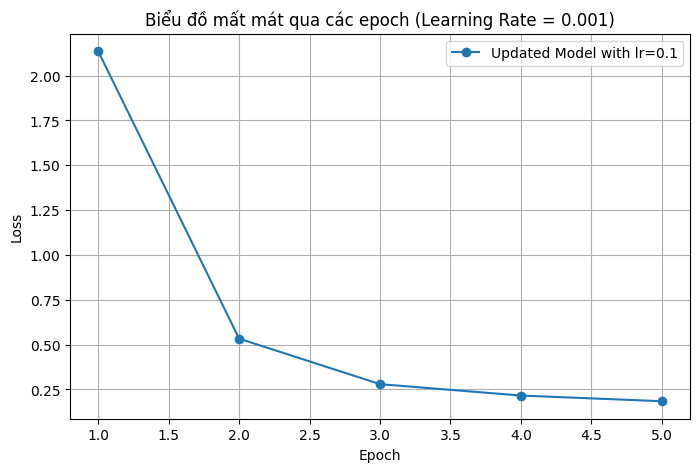

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Giả sử bạn đã có train_loader và device được định nghĩa trước đó

# Định nghĩa mô hình CNN
class MNIST_CNN_Updated(nn.Module):
    def __init__(self):
        super(MNIST_CNN_Updated, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Kích thước: 13x13
        x = self.pool(torch.relu(self.conv2(x)))  # Kích thước: 5x5
        x = self.pool(torch.relu(self.conv3(x)))  # Kích thước: 1x1
        x = x.view(-1, 64 * 1 * 1)  # Reshape
        x = self.fc1(x)
        return x

# Khởi tạo mô hình
model_updated = MNIST_CNN_Updated()
model_updated.to(device)

# Định nghĩa hàm mất mát và bộ tối ưu với learning rate mới
criterion_updated = nn.CrossEntropyLoss()
optimizer_updated = optim.SGD(model_updated.parameters(), lr=0.001, momentum=0.9)

# Huấn luyện mô hình mới
loss_values_updated = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_updated.zero_grad()
        outputs = model_updated(images)
        loss = criterion_updated(outputs, labels)
        loss.backward()
        optimizer_updated.step()

        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_values_updated.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# Vẽ biểu đồ mất mát cho mô hình đã cập nhật
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), loss_values_updated, marker='o', label='Updated Model with lr=0.1')
plt.title("Biểu đồ mất mát qua các epoch (Learning Rate = 0.001)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

Epoch 1, Loss: 0.4075
Epoch 2, Loss: 0.1807
Epoch 3, Loss: 0.1582
Epoch 4, Loss: 0.1454
Epoch 5, Loss: 0.1416


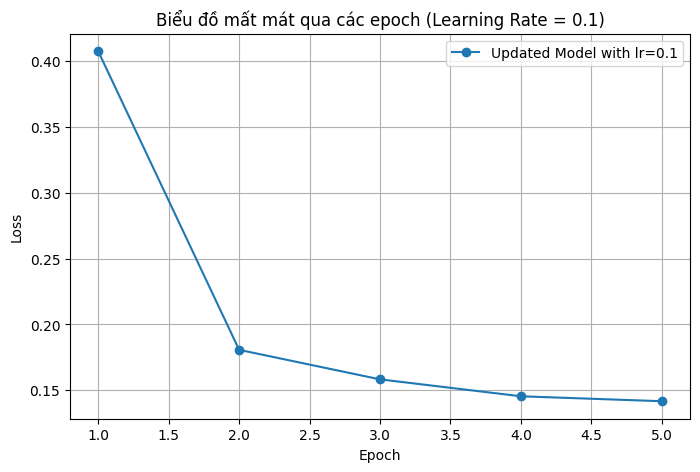

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Giả sử bạn đã có train_loader và device được định nghĩa trước đó

# Định nghĩa mô hình CNN
class MNIST_CNN_Updated(nn.Module):
    def __init__(self):
        super(MNIST_CNN_Updated, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Kích thước: 13x13
        x = self.pool(torch.relu(self.conv2(x)))  # Kích thước: 5x5
        x = self.pool(torch.relu(self.conv3(x)))  # Kích thước: 1x1
        x = x.view(-1, 64 * 1 * 1)  # Reshape
        x = self.fc1(x)
        return x

# Khởi tạo mô hình
model_updated = MNIST_CNN_Updated()
model_updated.to(device)

# Định nghĩa hàm mất mát và bộ tối ưu với learning rate mới
criterion_updated = nn.CrossEntropyLoss()
optimizer_updated = optim.SGD(model_updated.parameters(), lr=0.1, momentum=0.9)

# Huấn luyện mô hình mới
loss_values_updated = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_updated.zero_grad()
        outputs = model_updated(images)
        loss = criterion_updated(outputs, labels)
        loss.backward()
        optimizer_updated.step()

        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_values_updated.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# Vẽ biểu đồ mất mát cho mô hình đã cập nhật
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), loss_values_updated, marker='o', label='Updated Model with lr=0.1')
plt.title("Biểu đồ mất mát qua các epoch (Learning Rate = 0.1)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

### Lý d0
Learning rate là tham số quan trọng quyết định tốc độ cập nhật trọng số trong quá trình huấn luyện mô hình. Một learning rate cao có thể giúp mô hình hội tụ nhanh hơn, nhưng nếu quá cao, nó có thể gây ra sự dao động trong quá trình học. Ngược lại, một learning rate thấp giúp mô hình học ổn định hơn nhưng có thể làm chậm quá trình hội tụ.

# CÂU 4


Epoch 1, Loss: 0.3964
Epoch 2, Loss: 0.0929
Epoch 3, Loss: 0.0669
Epoch 4, Loss: 0.0530
Epoch 5, Loss: 0.0449


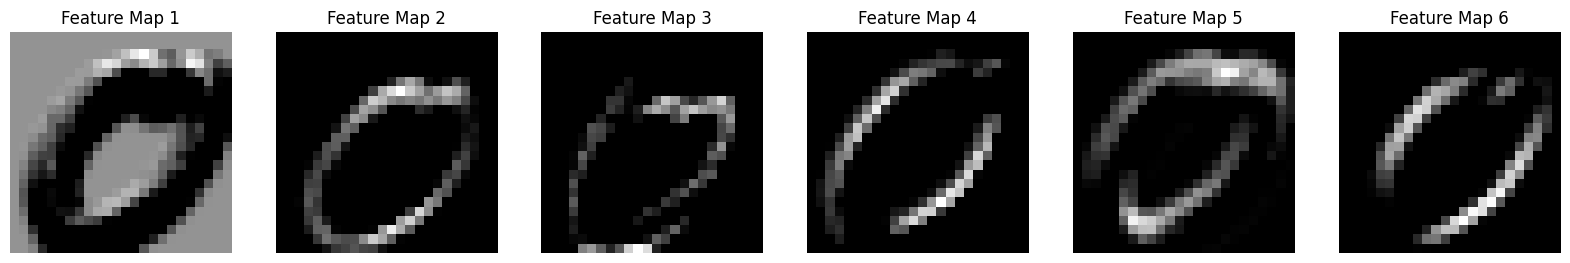

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Thiết lập thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Định nghĩa mô hình CNN
class MNIST_CNN_Updated(nn.Module):
    def __init__(self):
        super(MNIST_CNN_Updated, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(64 * 1 * 1, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Kích thước: 13x13
        x = self.pool(torch.relu(self.conv2(x)))  # Kích thước: 5x5
        x = self.pool(torch.relu(self.conv3(x)))  # Kích thước: 1x1
        x = x.view(-1, 64 * 1 * 1)  # Reshape
        x = self.fc1(x)
        return x

# Định nghĩa hàm visualize_feature_map
def visualize_feature_map(model, img):
    # Chuyển đổi hình ảnh vào mô hình
    with torch.no_grad():
        # Lấy đầu ra từ conv1
        conv1_output = torch.relu(model.conv1(img))
        # Lấy đầu ra từ conv2
        conv2_output = torch.relu(model.conv2(conv1_output))

    # Vẽ feature map từ conv2
    num_feature_maps = conv2_output.size(1)  # Số kênh đầu ra
    plt.figure(figsize=(20, 5))
    for i in range(min(num_feature_maps, 6)):  # Vẽ tối đa 6 feature maps
        plt.subplot(1, 6, i + 1)
        plt.imshow(conv2_output[0, i].detach().cpu(), cmap='gray')
        plt.axis('off')
        plt.title(f'Feature Map {i + 1}')
    plt.show()

# Tải dữ liệu MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Khởi tạo mô hình
model_updated = MNIST_CNN_Updated()
model_updated.to(device)

# Định nghĩa hàm mất mát và bộ tối ưu
criterion_updated = nn.CrossEntropyLoss()
optimizer_updated = optim.SGD(model_updated.parameters(), lr=0.01, momentum=0.9)

# Huấn luyện mô hình
loss_values_updated = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_updated.zero_grad()
        outputs = model_updated(images)
        loss = criterion_updated(outputs, labels)
        loss.backward()
        optimizer_updated.step()

        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_values_updated.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# Gọi hàm visualize_feature_map với một hình ảnh từ tập dữ liệu
# Lấy một hình ảnh từ train_loader
img, _ = next(iter(train_loader))  # Lấy một batch ảnh
img = img[0].unsqueeze(0).to(device)  # Lấy một ảnh và thêm kích thước batch

# Vẽ feature map từ tầng tích chập thứ hai
visualize_feature_map(model_updated, img)

### LÝ DO
Feature maps từ các tầng khác nhau của mô hình CNN thể hiện các đặc trưng ngày càng phức tạp của ảnh. Tầng đầu tiên thường phát hiện các đặc trưng đơn giản như cạnh và góc, trong khi các tầng sâu hơn nhận diện các đặc trưng phức tạp hơn, chẳng hạn như hình dạng và mẫu. Sự khác biệt này giúp mô hình học được các khía cạnh khác nhau của dữ liệu, từ cơ bản đến nâng cao.

